<a href="https://colab.research.google.com/github/edwin-isa/MACHINE_LEARNING/blob/UTS/UTS_Clustering_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------------------------------------------------------------

# Machine Learning
**UTS**

**Nama Anggota Kelompok**:

1. Alfina Salsabilla (2141720044 / TI-3D)
2. M Abiyyu Arldana S (2141720196 / TI-3D)
3. Mohamad Edwin Isa Alfais (2141720193 / TI-3D)

------------------------------------------------------------

# Segmentasi Gambar dengan Clustering

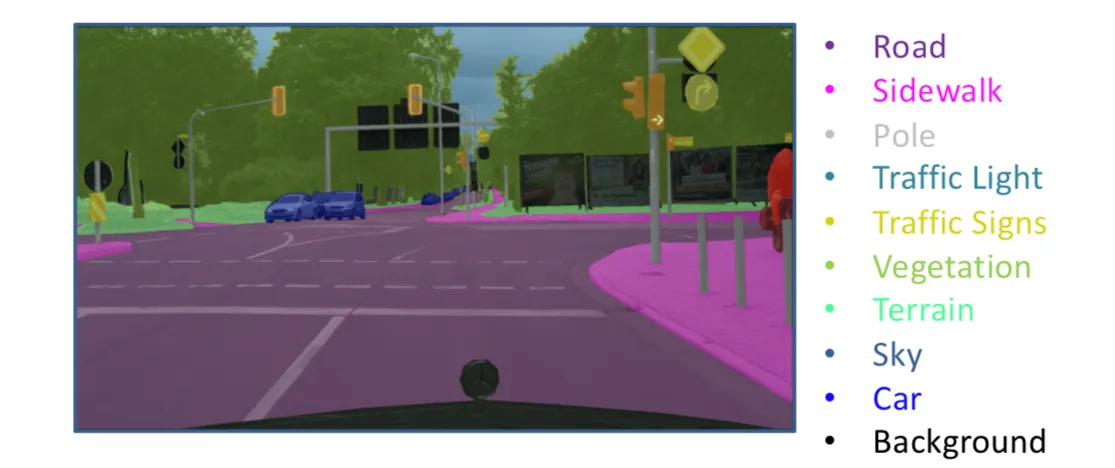

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

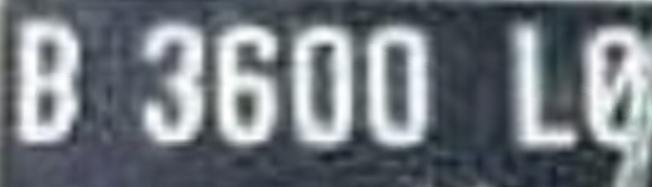

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Kode Bantuan

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

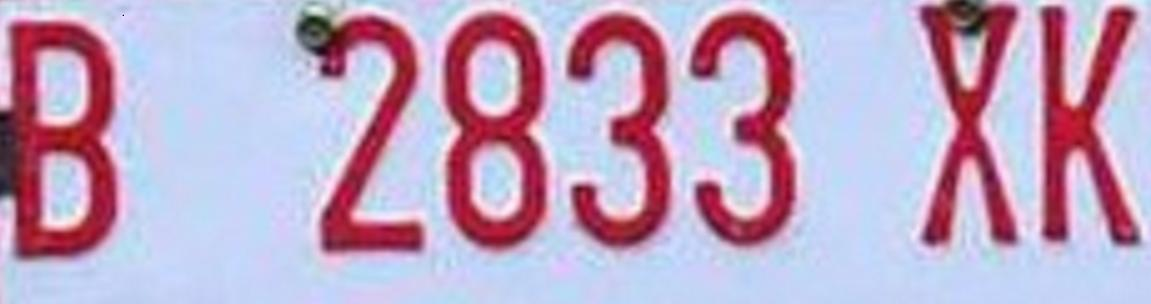

In [ ]:
# Load Gambar
img = cv2.imread('2.jpeg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img) # khusus google colab karena ada issue

In [ ]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

304
1151
3


In [ ]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(349904, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

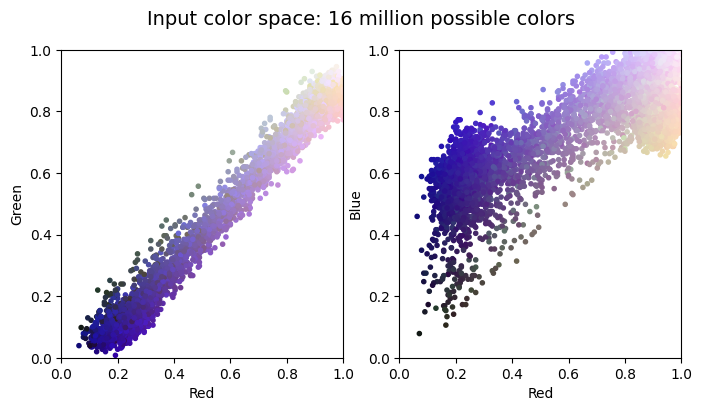

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

# Contoh Hasil Yang Diharapkan

Text(0.5, 1.0, '2-color Image')

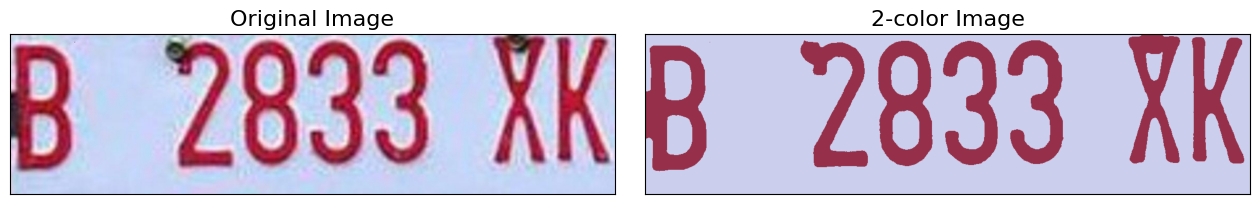

In [ ]:
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)

# Jawaban

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

In [ ]:
# Load Gambar
img_list = []

# Load and append each image to the list
img_1 = cv2.imread('/content/drive/MyDrive/Machine_Learning/img_1.jpg')
img_list.append(img_1)

img_2 = cv2.imread('/content/drive/MyDrive/Machine_Learning/img_2.jpg')
img_list.append(img_2)

img_3 = cv2.imread('/content/drive/MyDrive/Machine_Learning/img_3.jpg')
img_list.append(img_3)

img_4 = cv2.imread('/content/drive/MyDrive/Machine_Learning/img_4.jpg')
img_list.append(img_4)

img_5 = cv2.imread('/content/drive/MyDrive/Machine_Learning/img_5.jpg')
img_list.append(img_5)

In [ ]:
h_1, w_1, ch_1= img_1.shape
h_2, w_2, ch_2= img_2.shape
h_3, w_3, ch_3= img_3.shape
h_4, w_4, ch_4= img_4.shape
h_5, w_5, ch_5= img_5.shape

print(f"Image 1: Height = {h_1}, Width = {w_1}, Channels = {ch_1}")
print(f"Image 2: Height = {h_2}, Width = {w_2}, Channels = {ch_2}")
print(f"Image 3: Height = {h_3}, Width = {w_3}, Channels = {ch_3}")
print(f"Image 4: Height = {h_4}, Width = {w_4}, Channels = {ch_4}")
print(f"Image 5: Height = {h_5}, Width = {w_5}, Channels = {ch_5}")

Image 1: Height = 343, Width = 1183, Channels = 3
Image 2: Height = 281, Width = 908, Channels = 3
Image 3: Height = 324, Width = 1366, Channels = 3
Image 4: Height = 298, Width = 1089, Channels = 3
Image 5: Height = 258, Width = 1101, Channels = 3


In [ ]:
# Mendefinisikan fungsi untuk memproses gambar
def process_image(img):
    # Mendapatkan properti gambar
    h, w, ch = img.shape

    # Menormalisasi data gambar
    data = img / 255.0

    # Bentuk ulang data
    data = data.reshape(h * w, ch)

    return data

data_1 = process_image(img_1)
data_2 = process_image(img_2)
data_3 = process_image(img_3)
data_4 = process_image(img_4)
data_5 = process_image(img_5)

print(f"Data 1 Shape = {data_1.shape}")
print(f"Data 2 Shape = {data_2.shape}")
print(f"Data 3 Shape = {data_3.shape}")
print(f"Data 4 Shape = {data_4.shape}")
print(f"Data 5 Shape = {data_5.shape}")

Data 1 Shape = (405769, 3)
Data 2 Shape = (255148, 3)
Data 3 Shape = (442584, 3)
Data 4 Shape = (324522, 3)
Data 5 Shape = (284058, 3)


In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

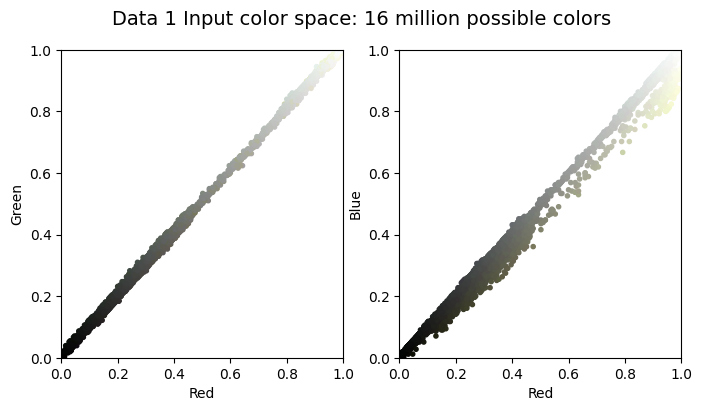

In [ ]:
plot_pixels(data_1, title='Data 1 Input color space: 16 million possible colors')

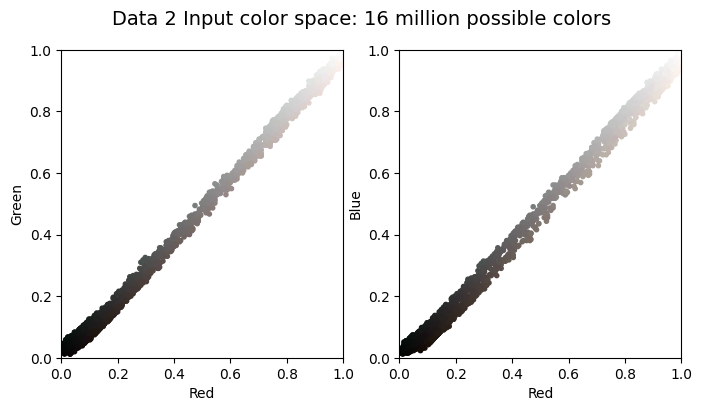

In [ ]:
plot_pixels(data_2, title='Data 2 Input color space: 16 million possible colors')

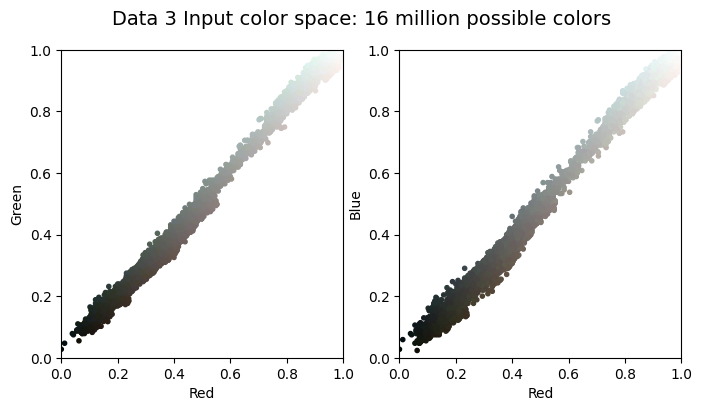

In [ ]:
plot_pixels(data_3, title='Data 3 Input color space: 16 million possible colors')

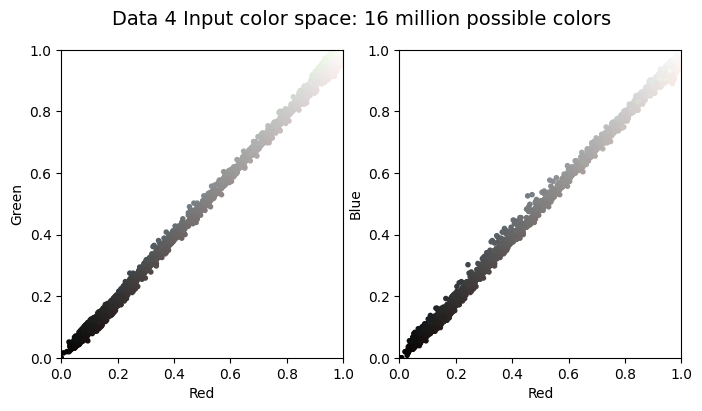

In [ ]:
plot_pixels(data_4, title='Data 4 Input color space: 16 million possible colors')

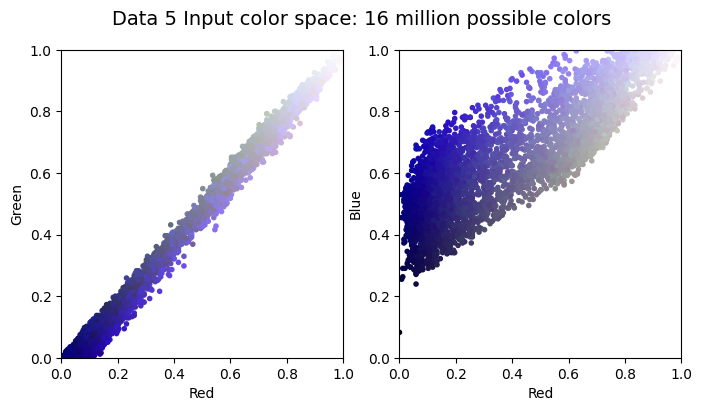

In [ ]:
plot_pixels(data_5, title='Data 5 Input color space: 16 million possible colors')

In [ ]:
# Mengubah gambar menjadi larik 2D dari piksel dan 3 nilai warna (RGB)
# Kemudian mengonversi menjadi tipe float
# Membuat daftar kosong untuk menyimpan nilai piksel yang telah diproses
processed_pixel_vals_list = []

def reshape_pixel(img):
    # Bentuk ulang dan konversi nilai piksel menjadi float32
    pixel_vals = img.reshape((-1, 3))
    pixel_vals = np.float32(pixel_vals)

    # Tambahkan nilai piksel yang telah diproses ke dalam daftar
    processed_pixel_vals_list.append(pixel_vals)

reshape_pixel(img_1)
reshape_pixel(img_2)
reshape_pixel(img_3)
reshape_pixel(img_4)
reshape_pixel(img_5)

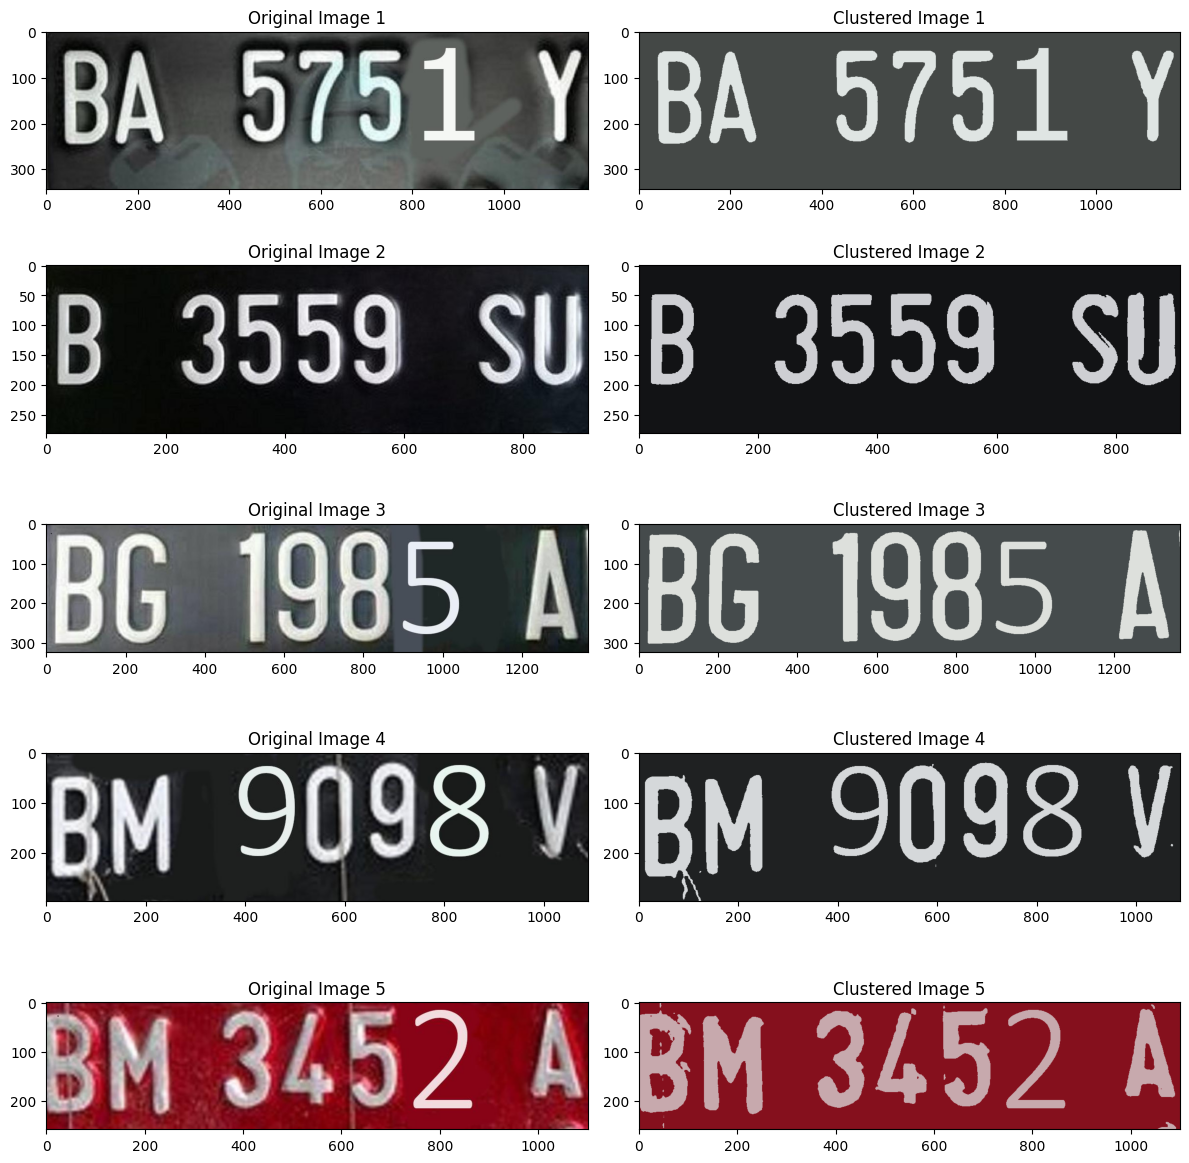

In [ ]:
# Parameter pengelompokan K-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 2

# Buat gambar untuk menampilkan semua gambar
plt.figure(figsize=(12, 12))

for i, pixel_vals in enumerate(processed_pixel_vals_list):
    # Melakukan pengelompokan K-means
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Konversi data menjadi nilai 8-bit
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]

    # Bentuk ulang data ke dimensi gambar asli
    segmented_image = segmented_data.reshape((img_list[i].shape))

    # Menampilkan gambar asli dan gambar terkelompok dalam subplot
    plt.subplot(5, 2, 2 * i + 1)  # 5 rows, 2 columns
    plt.imshow(cv2.cvtColor(img_list[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image {i + 1}')

    plt.subplot(5, 2, 2 * i + 2)  # 5 rows, 2 columns
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Clustered Image {i + 1}')

plt.tight_layout()
plt.show()